This first cell reads the data from disk

In [1]:
import pandas as pd
exam_data = pd.read_csv('data/PISA2009_Scored_Tests_MEX.csv')
bio_data = pd.read_csv('data/PISA2009_Questionnaire_MEX.csv')


This cell computes the scores for the students.

In [2]:
useless = {
    u' Version of cognitive database and date of release',
    u'3-character country code ',
    u'Adjudicated sub-region',
}

not_questions = {u'Booklet', 
                 u'School ID 5-digit', 
                 u'Student ID 5-digit',
                 u'OECD country',
                 u'Country code ISO 3-digit',}

score_mapping = {
    'Score 0': 0,
    'Score 1': 1,
    'Score 2': 2,
    'Not reached': 0,
}

questions = set(exam_data.columns) - not_questions - useless

for question in questions:
    exam_data[question] = exam_data[question].map(score_mapping)
    
math_qs = {q for q in questions if q.startswith('MATH')}
read_qs = {q for q in questions if q.startswith('READ')}
scie_qs = {q for q in questions if q.startswith('SCIE')}
    
totals = exam_data[list(questions)].sum(axis=1)
math_score = exam_data[list(math_qs)].sum(axis=1)
read_score = exam_data[list(read_qs)].sum(axis=1)
scie_score = exam_data[list(scie_qs)].sum(axis=1)

In [3]:
score_df = pd.DataFrame({'Total Score': totals, 
                         'Math Score': math_score, 
                         'Reading Score': read_score, 
                         'Science Score': scie_score,
                         'Student ID 5-digit': exam_data['Student ID 5-digit']})

In [4]:
data = pd.merge(score_df, bio_data, on='Student ID 5-digit')


In [5]:
list(data.columns)

['Math Score',
 'Reading Score',
 'Science Score',
 'Student ID 5-digit',
 'Total Score',
 'Country code 3-character',
 'Country code ISO 3-digit',
 'OECD country',
 'Adjudicated sub-region',
 'School ID 5-digit',
 'Grade',
 '<Programme>',
 'Birth Month',
 'Birth Year',
 'Sex',
 'Attend <ISCED 0>',
 'Age at <ISCED 1>',
 'Repeat <ISCED 1>',
 'Repeat <ISCED 2>',
 'Repeat <ISCED 3>',
 'At Home - Mother',
 'At Home - Father',
 'At Home - Brothers',
 'At Home - Sisters',
 'At Home - Grandparents',
 'At Home - Others',
 'Mother Occupation',
 'Mother  <Highest Schooling>',
 'Mother <ISCED 6>',
 'Mother <ISCED5A>',
 'Mother <ISCED5B>',
 'Mother <ISCED4>',
 'Mother Current Job Status',
 'Father Occupation',
 'Father  <Highest Schooling>',
 'Father <ISCED 6>',
 'Father <ISCED 5A>',
 'Father <ISCED 5B>',
 'Father <ISCED 4>',
 'Father Current Job Status',
 'Country of birth Self',
 'Country of birth Mother',
 'Country of birth Father',
 'Country of birth Age',
 'Language at home',
 'Possessions de

In [6]:
data['Reading Enjoyment Time'].value_counts()

30 minutes or less a day      16997
I don�t read for enjoyment     9071
Between 30 and 60 minutes      7047
1 to 2 hours a day             3772
More than 2 hours a day        1008
dtype: int64

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import seaborn as sns

In [9]:
def plot_hists(data, gb_key):
    groups = data.groupby(gb_key).groups
    for key, row_ids in groups.iteritems():
        pylab.hist(data['Total Score'][row_ids].values,
                   normed=True,
                   bins=np.linspace(0, 70, 11),
                   alpha=0.25,
                   label=str(key))
    pylab.legend()

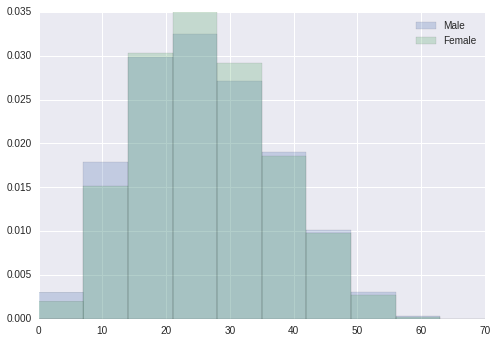

In [10]:
plot_hists(data, 'Sex')

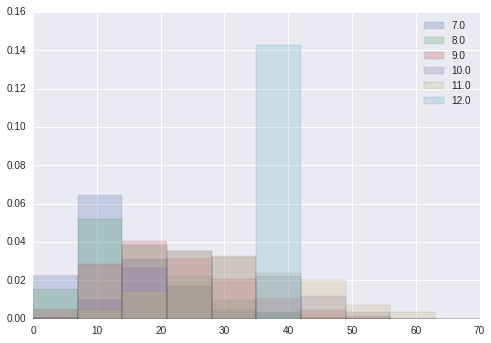

In [11]:
plot_hists(data, 'Grade')

/home/dallin/.virtualenvs/pisa/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


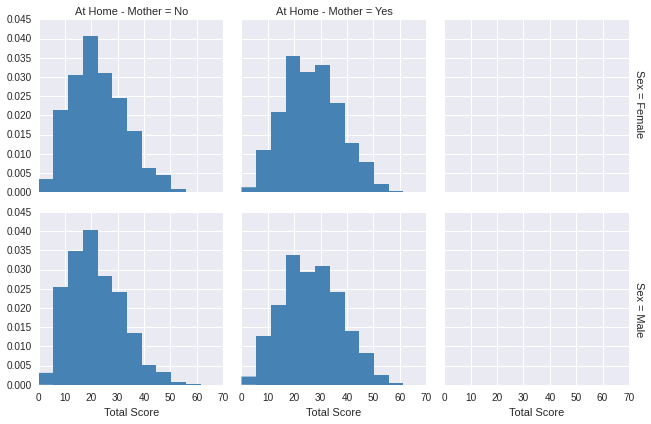

In [12]:
g = sns.FacetGrid(data, row="Sex", col="At Home - Mother", margin_titles=True)
bins = np.linspace(0, 67, 13)
g.map(plt.hist, "Total Score", color="steelblue", bins=bins, lw=0, normed=True)

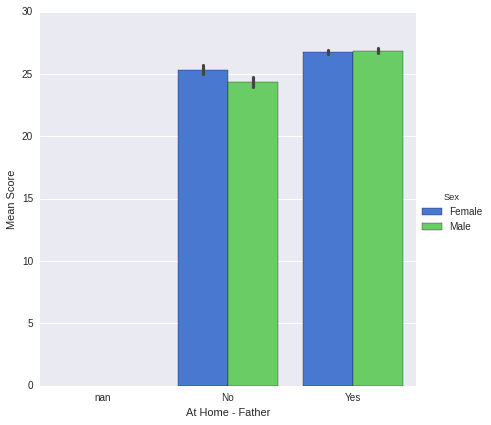

In [13]:
g = sns.factorplot("At Home - Father", "Total Score", "Sex",
                    data=data, kind="bar",
                    size=6, palette="muted", dropna=True)
g.despine(left=True)
g.set_ylabels("Mean Score")

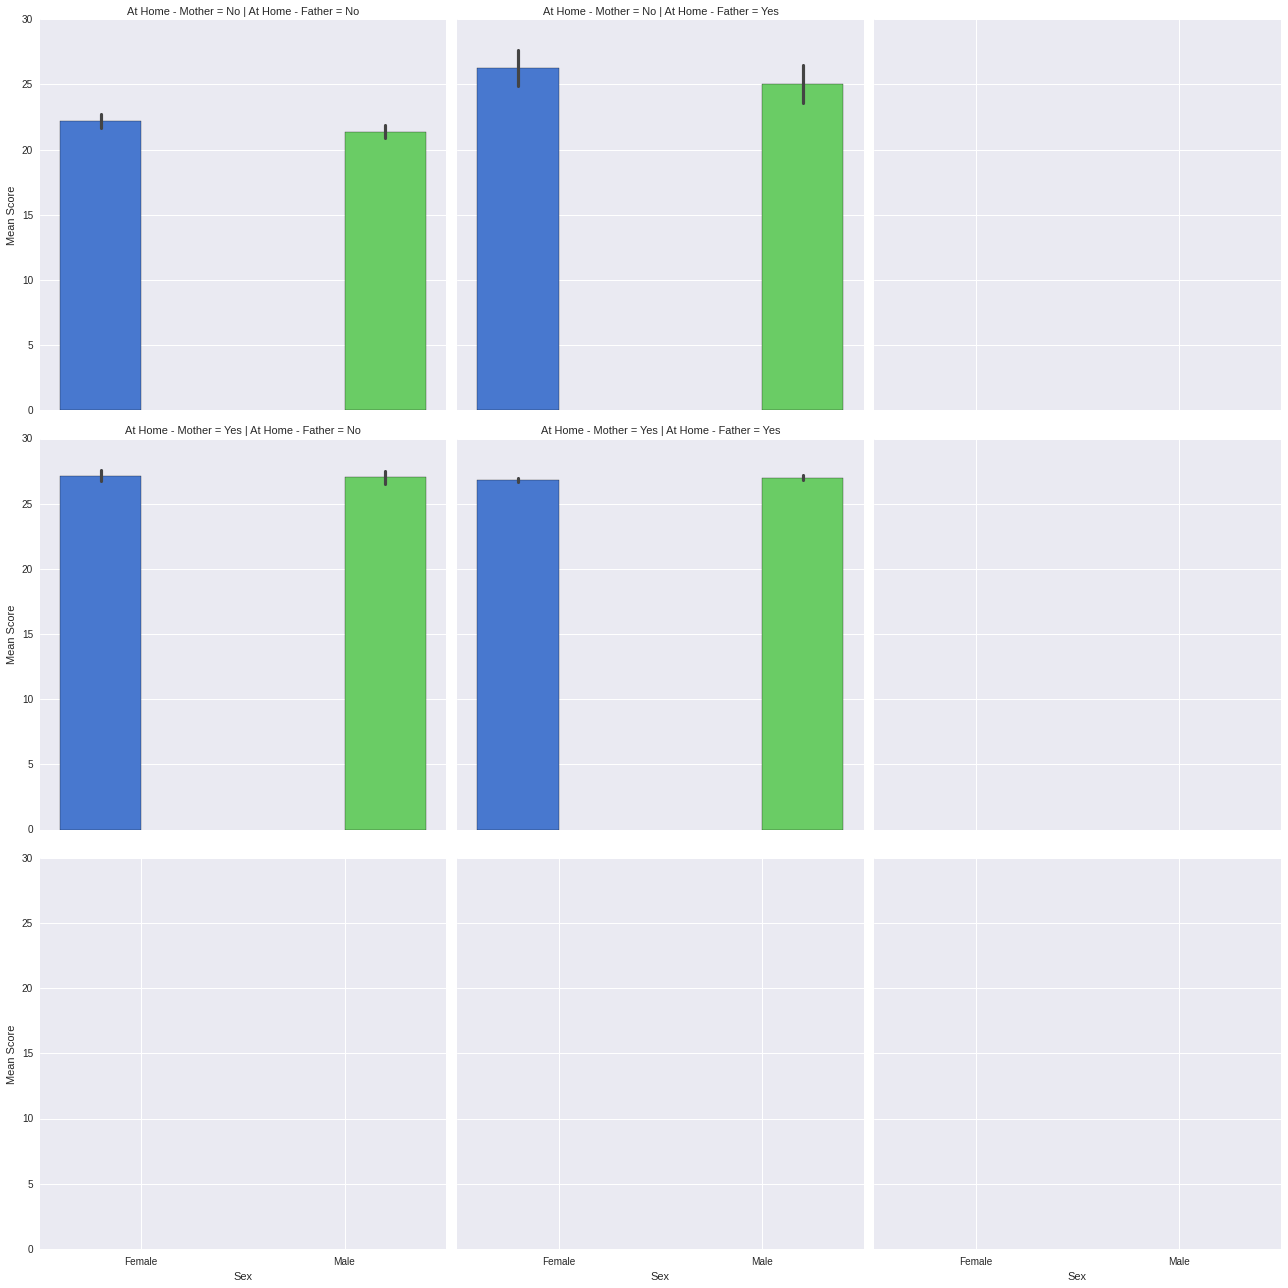

In [14]:
g = sns.factorplot("Sex", "Total Score", "Sex",
                   row="At Home - Mother",
                   col="At Home - Father",
                   data=data, kind="bar",
                   size=6, palette="muted",
                   dropna=True)
g.despine(left=True)
g.set_ylabels("Mean Score")

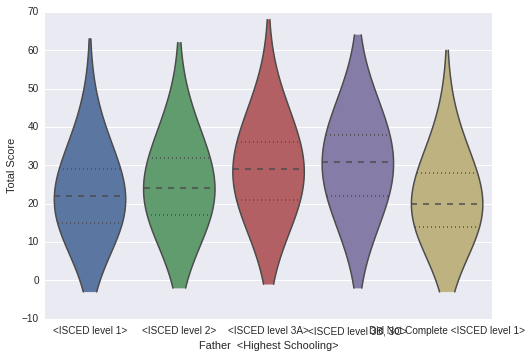

In [15]:
nonnull_subset = data['Total Score'].notnull()
sns.violinplot(data['Total Score'][nonnull_subset], 
               data['Father  <Highest Schooling>'][nonnull_subset], 
               inner='box',
               bw=1)